we look at the task of classifying images of digits using k-nearest neighbor classification. use files pa1train.txt, pa1validate.txt, pa1test.txt from ./data/*  They contain training, validation and test data sets.

Images are converted into vectors of pixel colors. They are in ASCII format and eah line contains feature vector of size 784, followed by it's label. Cordinates are sepearted by spacees

For k =2,4,8,100 KNN from test data. For each write training error and validation error. Which is better on validation data? What is test of error of this? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

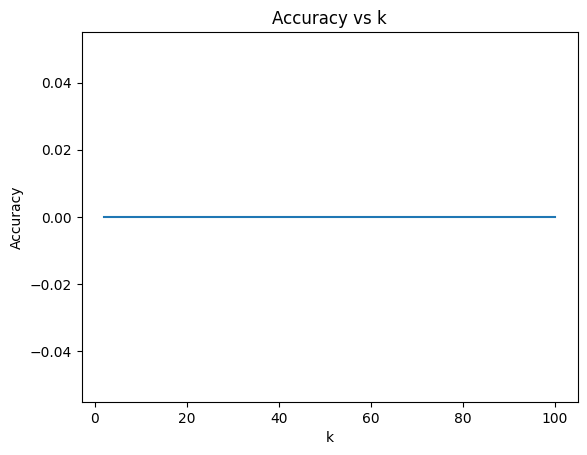

In [3]:
# For k = 2,48 build KNN
# For each k, calculate the accuracy
# Plot the accuracy vs k

# Load the data
train = pd.read_csv('./data/pa1train.txt')
test = pd.read_csv('./data/pa1test.txt')

# Split the data into X and y
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

# Calculate the distance between two points
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Calculate the accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# KNN
def knn(X_train, y_train, X_test, k):

    n = X_train.shape[0]

    m = X_train.shape[1]
    # Store the predictions
    predictions = []
    # For each test sample
    for i in range(len(X_test)):
        # Calculate the distance between the test sample and all the training samples
        distances = [distance(X_train[j], X_test[i]) for j in range(n)]
        # Sort the distances and get the indices of the sorted distances
        sorted_indices = np.argsort(distances)
        # Get the labels of the k nearest neighbors
        neighbors = [y_train[sorted_indices[j]] for j in range(k)]
        # Get the most common label
        most_common = max(set(neighbors), key = neighbors.count)
        # Append the prediction
        predictions.append(most_common)
    return predictions

# For k = 2,4,8 build KNN
# For each k, calculate the accuracy
# Plot the accuracy vs k
k_values = [2, 3, 4, 8, 100]
accuracies = []
for k in k_values:
    predictions = knn(X_train, y_train, X_test, k)
    accuracies.append(accuracy(y_test, predictions))
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()
